This notebook outlines a precise **data preparation and transformation** process for histopathology images using their corresponding segmentation masks. The primary goal is to perform a controlled division of a single image into two new, complementary image sets: **Region of Interest (ROI)** and **Non-ROI** .

The method calculates the **average color** of the entire original image and uses this color to fill the areas that are being excluded in the respective output images. This results in two synthetic images:
1.  **ROI Image:** This image preserves only the mycetoma grains (the foreground defined by the mask) and replaces all background tissue with the average color.
2.  **Non-ROI Image:** This image preserves only the background tissue (the area outside the mask) and replaces the mycetoma grains with the average color.

This process is critical for subsequent comparative analysis, allowing researchers to train and test models specifically on the color and structural features of the mycetoma grains (ROI) versus the surrounding normal tissue (Non-ROI).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the original image and the segmentation mask
original_image = cv2.imread('/content/drive/MyDrive/test/23HF2248_4.jpg')
mask = cv2.imread('/content/drive/MyDrive/test/23HF2248_4_mask.jpg', cv2.IMREAD_GRAYSCALE)


In [ ]:
# Compute the average color over the entire original image
average_color = original_image.mean(axis=(0, 1), dtype=int)

In [ ]:
# Create ROI and Non-ROI images filled with the average color
roi_image = np.full_like(original_image, average_color)
non_roi_image = np.full_like(original_image, average_color)

In [ ]:
# Apply the mask to set ROI and Non-ROI areas
roi_image[mask > 0] = original_image[mask > 0]  # Keep only the ROI in roi_image
non_roi_image[mask == 0] = original_image[mask == 0]  # Keep only the Non-ROI in non_roi_image



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


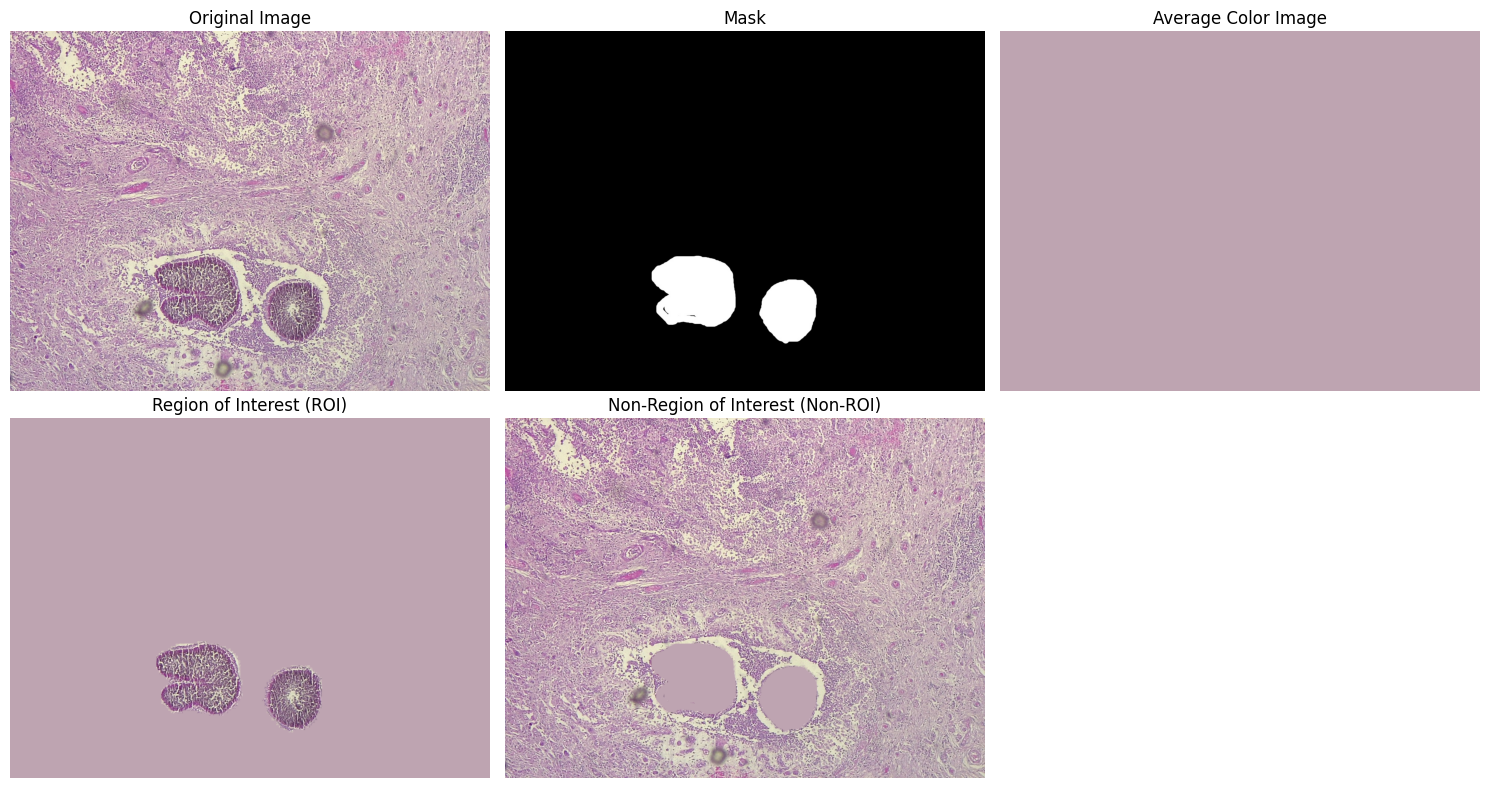

In [ ]:
# Display the images
plt.figure(figsize=(15, 8))

# Plot original image
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Plot mask
plt.subplot(2, 3, 2)
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.axis("off")

# Plot average color region (entire image with average color)
plt.subplot(2, 3, 3)
plt.title("Average Color Image")
plt.imshow(cv2.cvtColor(np.full_like(original_image, average_color), cv2.COLOR_BGR2RGB))
plt.axis("off")

# Plot ROI image
plt.subplot(2, 3, 4)
plt.title("Region of Interest (ROI)")
plt.imshow(cv2.cvtColor(roi_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Plot Non-ROI image
plt.subplot(2, 3, 5)
plt.title("Non-Region of Interest (Non-ROI)")
plt.imshow(cv2.cvtColor(non_roi_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()
